# Exploratory Data Analysis and Advanced Preprocessing
## Objective
- Perform exploratory data analysis (EDA) to understand patterns, distributions, and trends in the content and meta tags (`Content`, `Meta_Title`, and `Meta_Description`) of the scraped guides.
- Identify and remove additional domain-specific or irrelevant stopwords based on the analysis.
## Workflow
1. Load preprocessed data from the previous notebook
2. Analyze word frequency distributions across all text fields
3. Identify and remove additional domain-specific stopwords based on the analysis
4. Explore trends in meta tags (e.g., length distributions, keyword usage.
6. Save the fully processed data for downstream tasks

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

# Configure visualizations
plt.style.use('ggplot')

## Load Data

In [2]:
data_filepath = "data/initial_preprocessed_data.pkl"
preprocessed_dataframe = pd.read_pickle(data_filepath)

## Analyze Word Frequency Distributions

Word frequency analysis helps identify commonly used terms across all text fields, highlighting patterns and potential noise. This step will be performed separately for `Content`, `Meta_Title`, and `Meta_Description`.

In [3]:
def plot_word_frequencies_single(ax, column, title):
    all_words = [word for row in preprocessed_dataframe[column].dropna() for word in row]
    word_counts = Counter(all_words)
    most_common = word_counts.most_common(20)

    ax.bar(*zip(*most_common))
    ax.set_title(f"{title}", fontsize=18)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.set_xlabel("Words", fontsize=14)
    ax.tick_params(axis='x', labelrotation=70, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    freq_table = pd.DataFrame(most_common, columns=["Word/Ngram", "Frequency"])
    print(f"\nTable of Most Frequent Words/Ngrams for {title}")
    print(freq_table.head(20))

def plot_word_frequencies_row(columns_and_titles):
    fig, axes = plt.subplots(1, 3, figsize=(30, 8))
    for ax, (column, title) in zip(axes, columns_and_titles):
        plot_word_frequencies_single(ax, column, title)
    plt.tight_layout()
    plt.show()

content_columns_and_titles = [
    ("Unigrams_Content", "Unigrams Content (1-word)"),
    ("Bigrams_Content", "Bigrams Content (2-word)"),
    ("Trigrams_Content", "Trigrams Content (3-word)")
]

title_columns_and_titles = [
    ("Unigrams_Meta_Title", "Unigrams Meta Title (1-word)"),
    ("Bigrams_Meta_Title", "Bigrams Meta Title (2-word)"),
    ("Trigrams_Meta_Title", "Trigrams Meta Title (3-word)")
]

description_columns_and_titles = [
    ("Unigrams_Meta_Description", "Unigrams Meta Description (1-word)"),
    ("Bigrams_Meta_Description", "Bigrams Meta Description (2-word)"),
    ("Trigrams_Meta_Description", "Trigrams Meta Description (3-word)")
]


Table of Most Frequent Words/Ngrams for Unigrams Content (1-word)
   Word/Ngram  Frequency
0           3        473
1        gate        442
2      baldur        433
3        game        254
4       guide        219
5         mod        203
6       level        183
7   character        171
8       class        167
9        find        160
10   minthara        148
11      spell        145
12        get        132
13      party        129
14        one        114
15          1        111
16    mayrina        110
17      ethel        108
18       need        107
19  companion        105

Table of Most Frequent Words/Ngrams for Bigrams Content (2-word)
          Word/Ngram  Frequency
0        baldur gate        433
1             gate 3        408
2      larian studio         86
3        owlbear cub         68
4            day ago         45
5        mod manager         41
6      indiana jones         39
7       auntie ethel         32
8       change spell         31
9            lae zel  

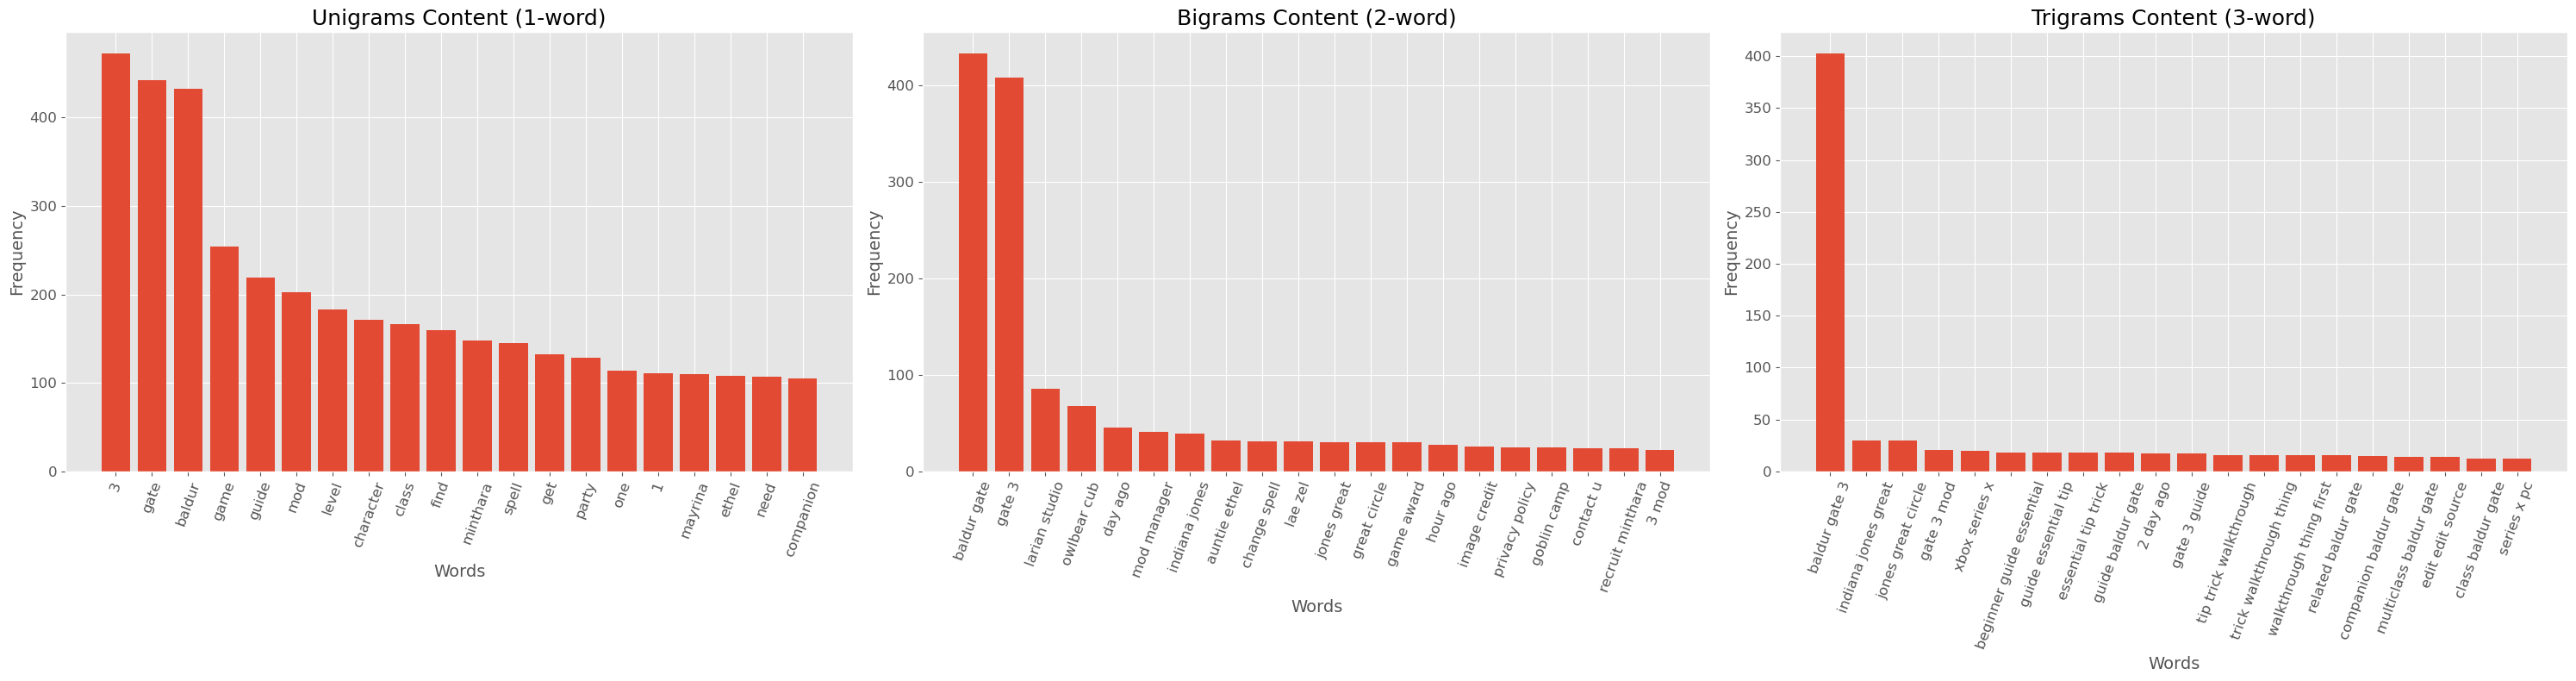

In [4]:
plot_word_frequencies_row(content_columns_and_titles)


Table of Most Frequent Words/Ngrams for Unigrams Meta Title (1-word)
    Word/Ngram  Frequency
0       baldur         30
1         gate         30
2            3         22
3        guide         13
4          iii          8
5          ign          8
6    companion          7
7          bg3          6
8   multiclass          5
9       change          5
10     recruit          5
11         get          4
12       spell          4
13    minthara          4
14  pickpocket          4
15        save          4
16     mayrina          4
17     install          3
18         mod          3
19      respec          3

Table of Most Frequent Words/Ngrams for Bigrams Meta Title (2-word)
           Word/Ngram  Frequency
0         baldur gate         30
1              gate 3         22
2            gate iii          8
3           iii guide          8
4           guide ign          8
5        save mayrina          4
6   multiclass baldur          3
7         install mod          3
8           3 recr

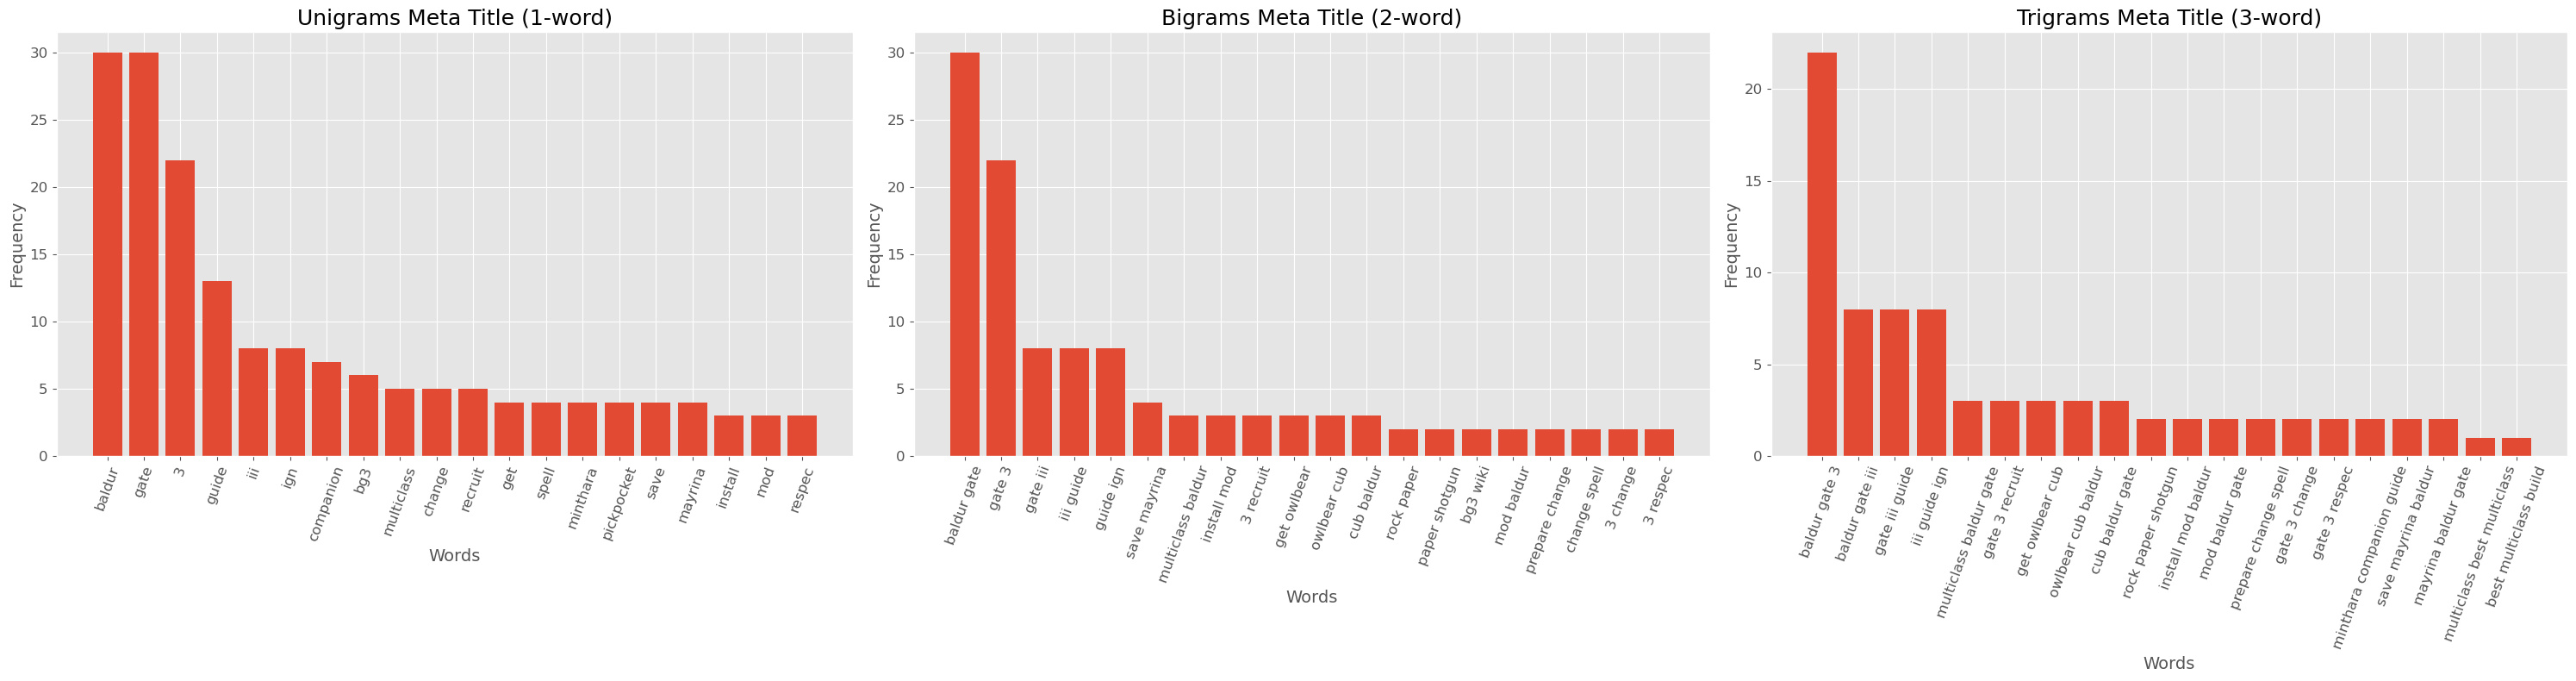

In [5]:
plot_word_frequencies_row(title_columns_and_titles)


Table of Most Frequent Words/Ngrams for Unigrams Meta Description (1-word)
       Word/Ngram  Frequency
0          baldur         28
1            gate         28
2               3         27
3             bg3          8
4           class          6
5             one          6
6             mod          6
7         mayrina          6
8       character          5
9           guide          5
10           need          5
11         player          5
12          spell          5
13         change          5
14        recruit          5
15        owlbear          4
16          quest          4
17  multiclassing          3
18          build          3
19           want          3

Table of Most Frequent Words/Ngrams for Bigrams Meta Description (2-word)
              Word/Ngram  Frequency
0            baldur gate         28
1                 gate 3         27
2           save mayrina          3
3                  3 let          2
4            install mod          2
5        everything need

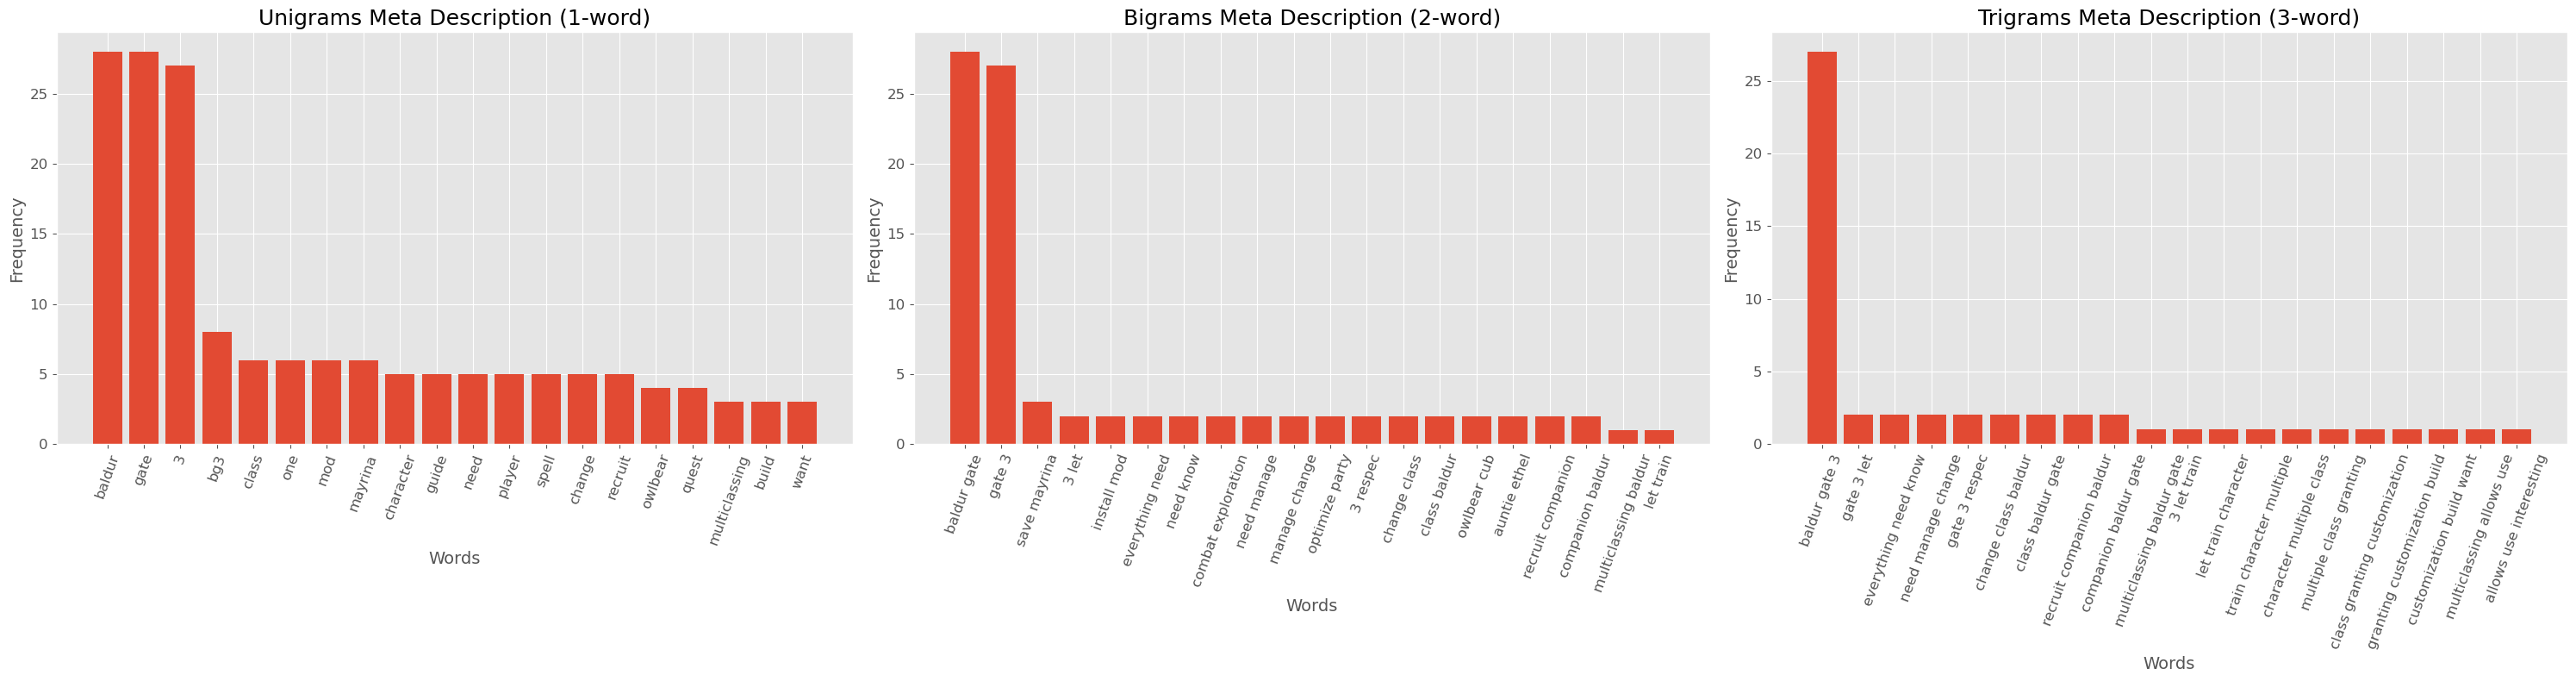

In [6]:
plot_word_frequencies_row(description_columns_and_titles)

## Analysis of Frequencies and Further Removal of Words
The title Baldur's Gate 3 appears very frequently across all guides, highlighting its importance in the content, meta titles, and meta descriptions. However, to achieve a more refined analysis, we will remove variations of the game's title from all relevant columns while acknowledging its significance in SEO and guide relevance. I will also remove a few extra terms like "larian", "studio", "game", "1", "2", "one", and publication names.

In [7]:
stop_terms = {"baldur", "gate", "3", "iii","larian","studio","game","1","2","one","ign","gamespot","rock","paper","shotgun"}

def filter_tokens(tokens):
    if isinstance(tokens, list):
        return [token for token in tokens if not any(term in token for term in stop_terms)]
    return tokens

content_columns = ["Unigrams_Content", "Bigrams_Content", "Trigrams_Content"]
title_columns = ["Unigrams_Meta_Title", "Bigrams_Meta_Title", "Trigrams_Meta_Title"]
description_columns = ["Unigrams_Meta_Description", "Bigrams_Meta_Description", "Trigrams_Meta_Description"]

for column in content_columns + title_columns + description_columns:
    preprocessed_dataframe[column] = preprocessed_dataframe[column].apply(filter_tokens)

## Content Charts


Table of Most Frequent Words/Ngrams for Unigrams Content (1-word)
   Word/Ngram  Frequency
0       guide        219
1         mod        203
2       level        183
3   character        171
4       class        167
5        find        160
6    minthara        148
7       spell        145
8         get        132
9       party        129
10    mayrina        110
11      ethel        108
12       need        107
13  companion        105
14       make        105
15    owlbear        104
16    recruit         96
17     change         91
18      first         88
19        cub         84

Table of Most Frequent Words/Ngrams for Bigrams Content (2-word)
          Word/Ngram  Frequency
0        owlbear cub         68
1            day ago         45
2        mod manager         41
3       auntie ethel         32
4       change spell         31
5            lae zel         31
6       great circle         30
7           hour ago         28
8       image credit         26
9     privacy policy  

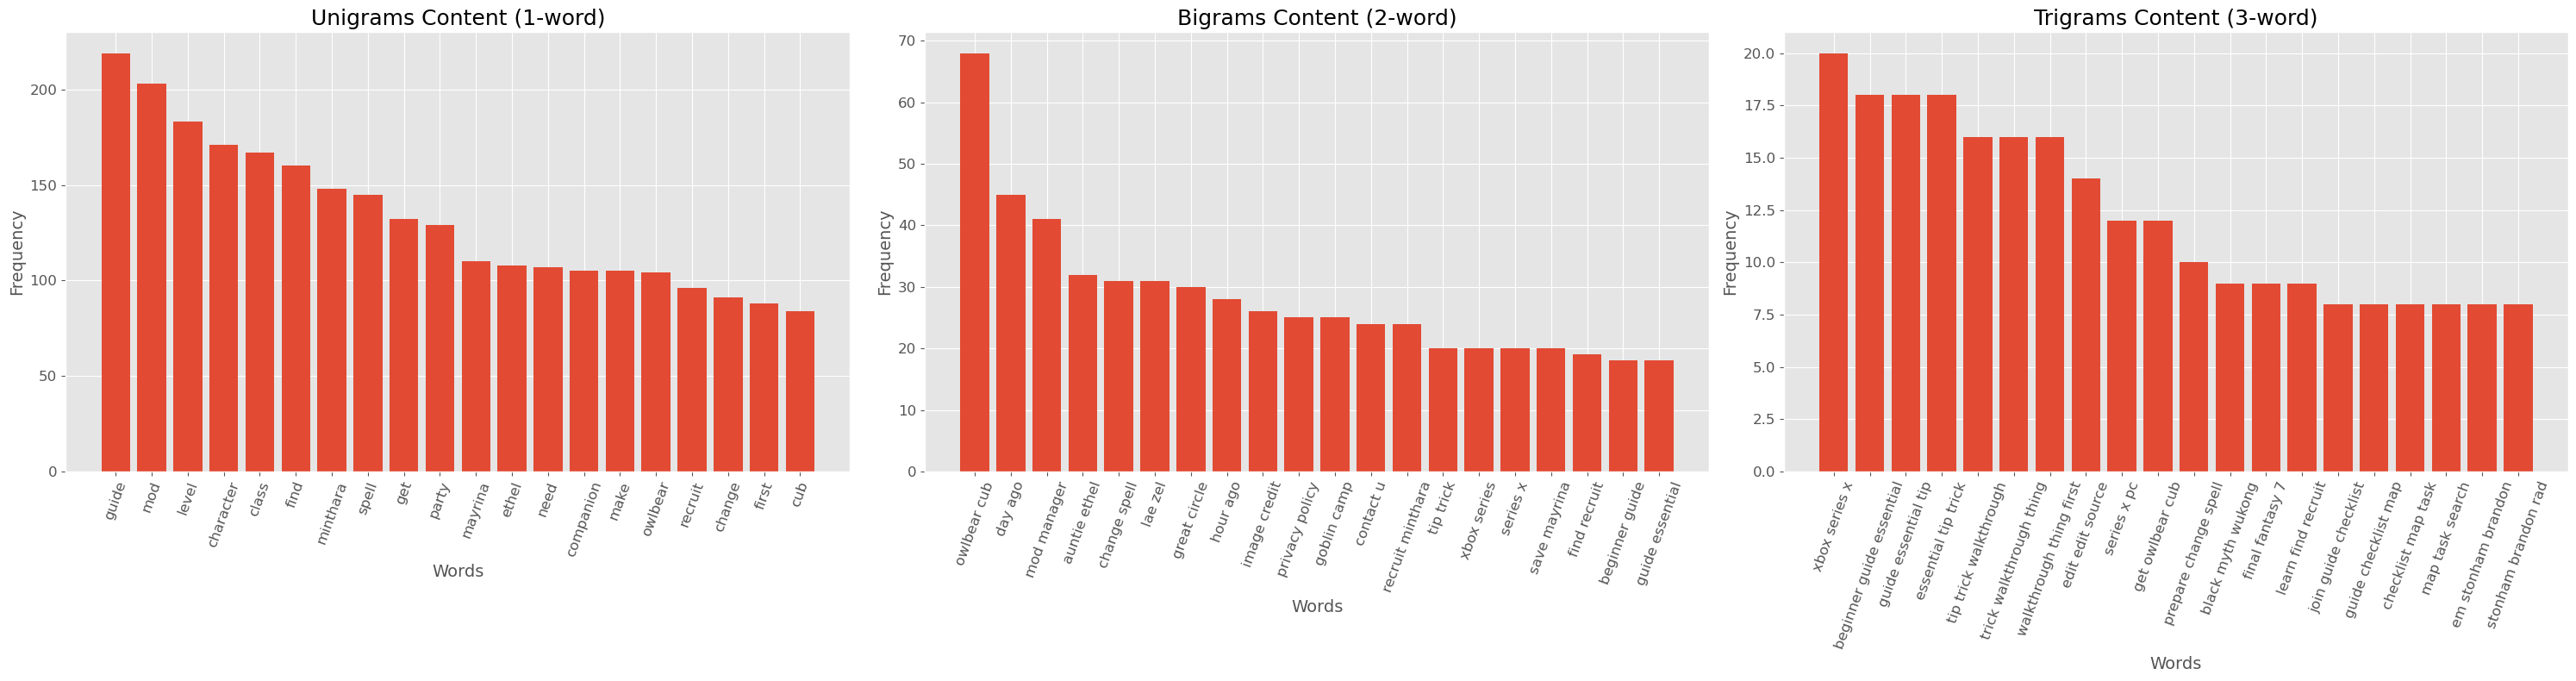

In [8]:
plot_word_frequencies_row(content_columns_and_titles)

## Analysis of Content 
### Bigrams and Trigrams:
The analysis of frequent bigrams and trigrams in the content reveals that many of the top phrases are not directly related to Baldur's Gate 3 or the specific guide information. Instead, they reflect broader references to the current gaming climate. Notable examples include mentions of Indiana Jones: The Great Circle and Path of Exile 2, both of which were recently released in December 2024. Additionally, phrases referencing the 2024 Game Awards and other popular titles like Elden Ring are prominent.

This suggests that guide pages are incorporating links and references to trending topics in the gaming industry. This approach likely serves multiple purposes:

Engagement: By including links to articles about trending games and events, the guides encourage readers to explore related content.
SEO Optimization: Including trending keywords and topics can improve the page's search engine ranking, driving more traffic to the site.
Overall, this strategy highlights how gaming guides balance relevance to their core content with broader industry trends to enhance visibility and reader engagement.
### Analysis of Content Unigrams:
Unlike the bigrams and trigrams, which show a broader focus on trending topics in the gaming industry, the unigrams maintain a high emphasis on words directly relevant to Baldur's Gate 3 guides. Many of the most frequent unigrams align closely with the initial questions sourced from Google. Examples include level, Minthara, find, character, guide, owlbear, party, class, spells, Mayrina, Ethel, mod, cub, and recruit.

This indicates that the core content of the guides is strongly aligned with user search intent, ensuring that the most relevant terms for Baldur's Gate 3 players are well-represented. These findings highlight the effectiveness of these guides in targeting specific queries and providing valuable information to readers.

## Meta Title Charts


Table of Most Frequent Words/Ngrams for Unigrams Meta Title (1-word)
    Word/Ngram  Frequency
0        guide         13
1    companion          7
2   multiclass          5
3       change          5
4      recruit          5
5          get          4
6        spell          4
7     minthara          4
8   pickpocket          4
9         save          4
10     mayrina          4
11     install          3
12         mod          3
13      respec          3
14        find          3
15     owlbear          3
16         cub          3
17        best          2
18       build          2
19     polygon          2

Table of Most Frequent Words/Ngrams for Bigrams Meta Title (2-word)
            Word/Ngram  Frequency
0         save mayrina          4
1          install mod          3
2          get owlbear          3
3          owlbear cub          3
4       prepare change          2
5         change spell          2
6         change class          2
7         find recruit          2
8     rec

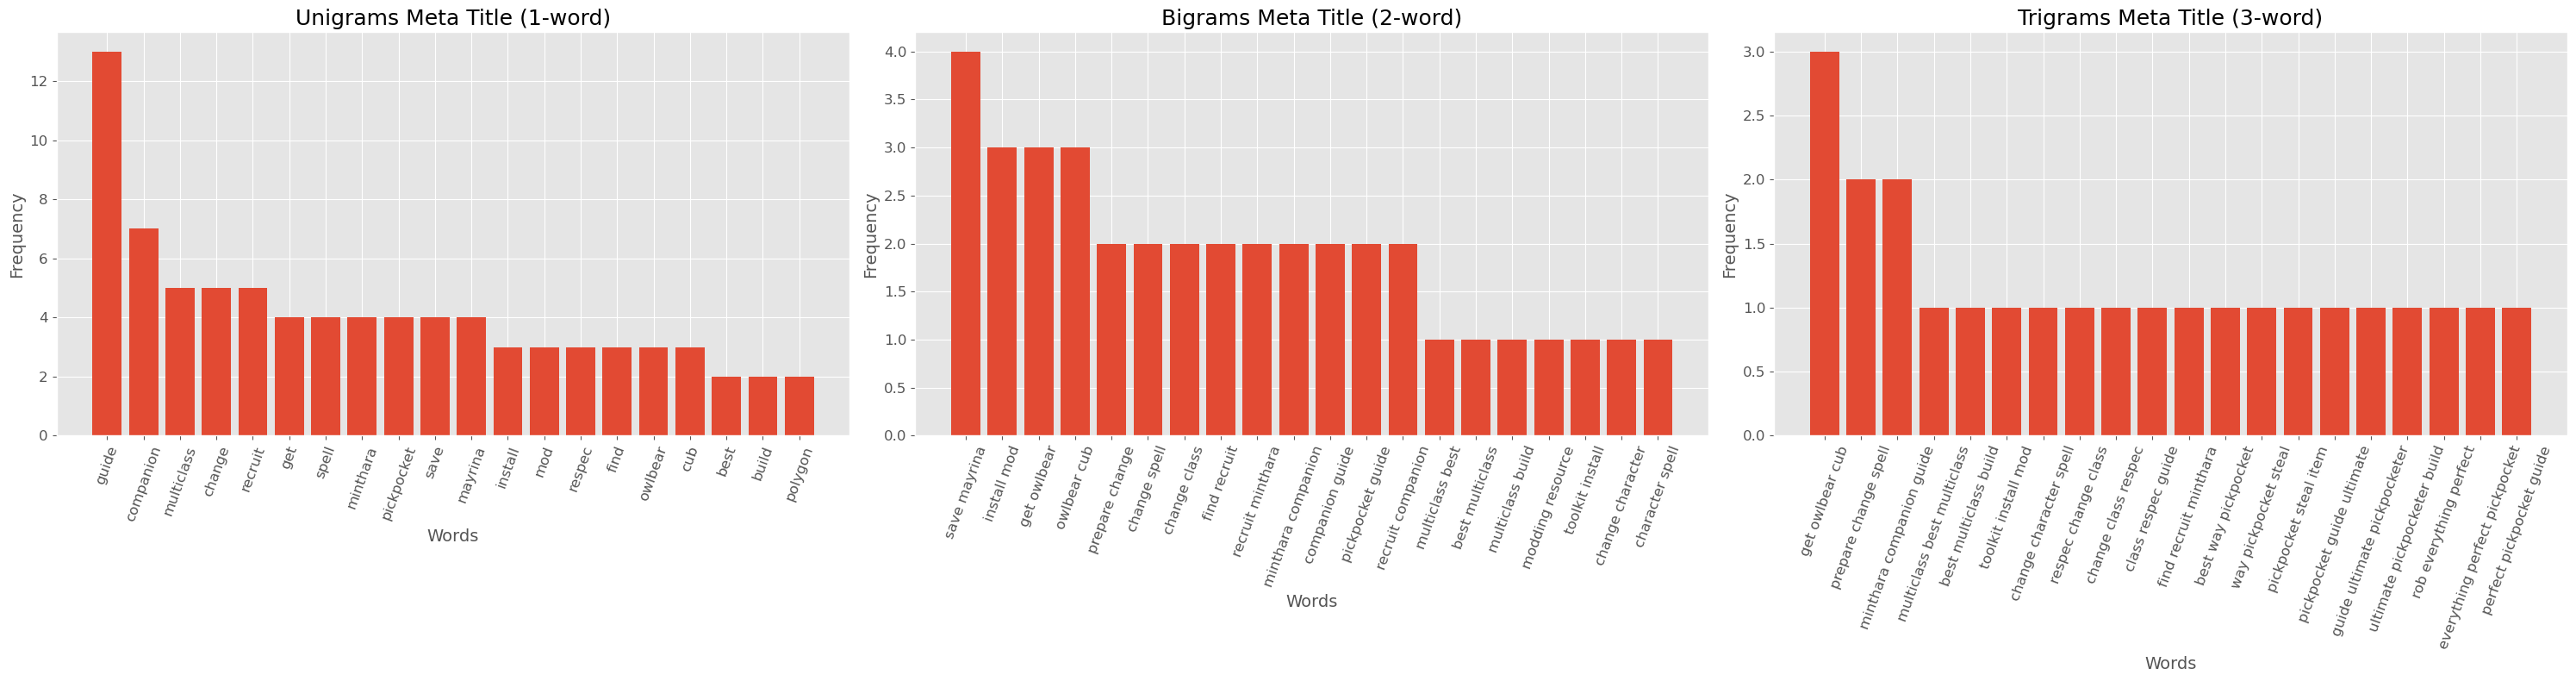

In [9]:
plot_word_frequencies_row(title_columns_and_titles)

## Investigating Low Frequencies of Meta Titles
The word frequencies in meta titles are relatively low. To better understand this, we will analyze the length of the meta titles to identify any patterns or insights.

In [10]:
def calculate_average_length(column):
    word_lengths = column.dropna().apply(lambda x: len(x.split()))
    return word_lengths.mean()

average_meta_title_length = calculate_average_length(preprocessed_dataframe['Meta_Title'])
print(f"The average length of Meta Titles is: {average_meta_title_length:.2f} words")

preprocessed_dataframe["Meta_Title_Length"] = preprocessed_dataframe["Meta_Title"].dropna().apply(lambda x: len(x.split()))

The average length of Meta Titles is: 6.36 words


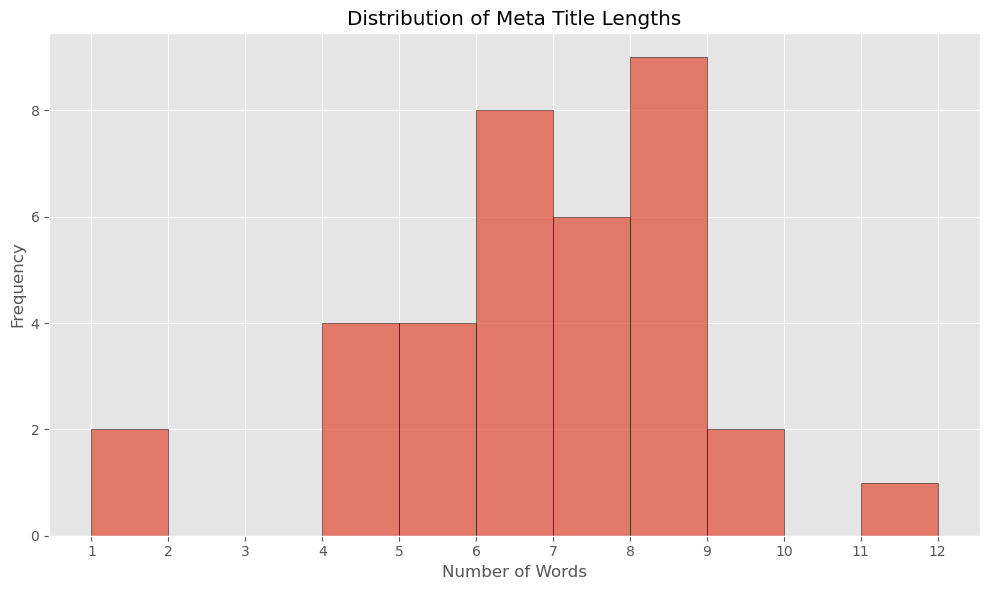

In [11]:
def plot_length_distribution(column, title):
    lengths = column.dropna().apply(lambda x: len(x.split()))

    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=range(1, max(lengths) + 2), edgecolor="black", alpha=0.7)
    plt.title(f"Distribution of {title} Lengths")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.xticks(range(1, max(lengths) + 2))
    plt.tight_layout()
    plt.show()

plot_length_distribution(preprocessed_dataframe['Meta_Title'], "Meta Title")

## Analysis of Meta Title:
The average length of a meta title is 6.36 words, which is relatively concise. Given that our dataset examines nine different questions with only four guides per question, it is expected that term frequencies will generally remain low. For instance, it would be unusual for n-grams to appear more than four times unless the same term is used across multiple guides for different questions.

However, there are exceptions, such as the words "guide", "companion", "multiclass", "recruit" and "change" having 5+. Despite the limited number of guides, there is a strong overlap between the keywords in the Google search questions and the n-grams in the meta titles. Terms such as "multiclass", "install mods", "change spells", "respec", "Minthara", "Owlbear cub", "pickpocket", "save Mayrina", and "companions" frequently appear, highlighting the importance of aligning meta titles with search queries for SEO relevance.

In terms of frequency:

Ignoring the word guide, many unigrams had a frequency of 2-7 for the majority of values.
Bigrams were observed 2–4 times for 13 different values.
Trigrams had only three non-unique occurrences but less is expected for a trigram given the average length of a title is only 6.36 words.
This pattern aligns with the short average word length of meta titles, where the limited space requires focusing on highly relevant keywords. Overall, this demonstrates how meta titles effectively capture the intent and keywords of user searches, reinforcing their critical role in SEO.

## Meta Description Charts


Table of Most Frequent Words/Ngrams for Unigrams Meta Description (1-word)
       Word/Ngram  Frequency
0           class          6
1             mod          6
2         mayrina          6
3       character          5
4           guide          5
5            need          5
6          player          5
7           spell          5
8          change          5
9         recruit          5
10        owlbear          4
11          quest          4
12  multiclassing          3
13          build          3
14           want          3
15     multiclass          3
16        explain          3
17     everything          3
18          learn          3
19        install          3

Table of Most Frequent Words/Ngrams for Bigrams Meta Description (2-word)
                Word/Ngram  Frequency
0             save mayrina          3
1              install mod          2
2          everything need          2
3                need know          2
4       combat exploration          2
5           

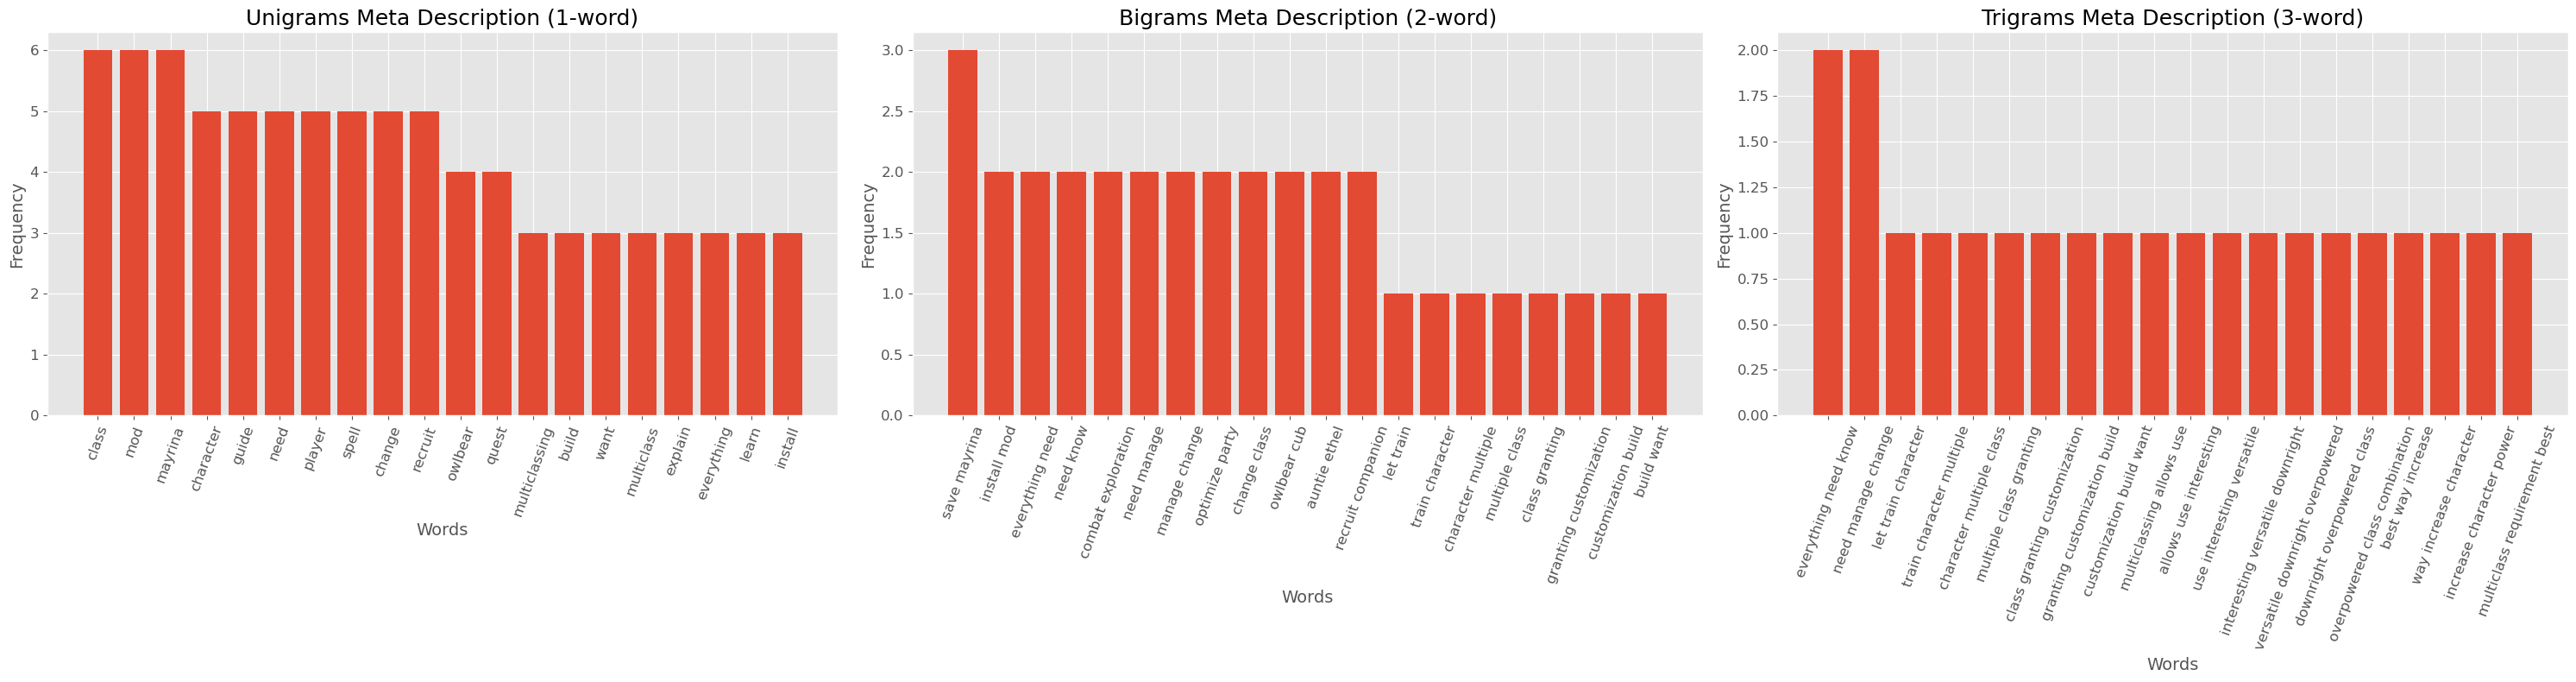

In [12]:
plot_word_frequencies_row(description_columns_and_titles)

## Investigating Low Frequencies of Meta Descriptions

In [13]:
average_meta_description_length = calculate_average_length(preprocessed_dataframe['Meta_Description'])
print(f"The average length of Meta Descriptions is: {average_meta_description_length:.2f} words")

preprocessed_dataframe["Meta_Description_Length"] = preprocessed_dataframe["Meta_Description"].dropna().apply(lambda x: len(x.split()))

The average length of Meta Descriptions is: 11.69 words


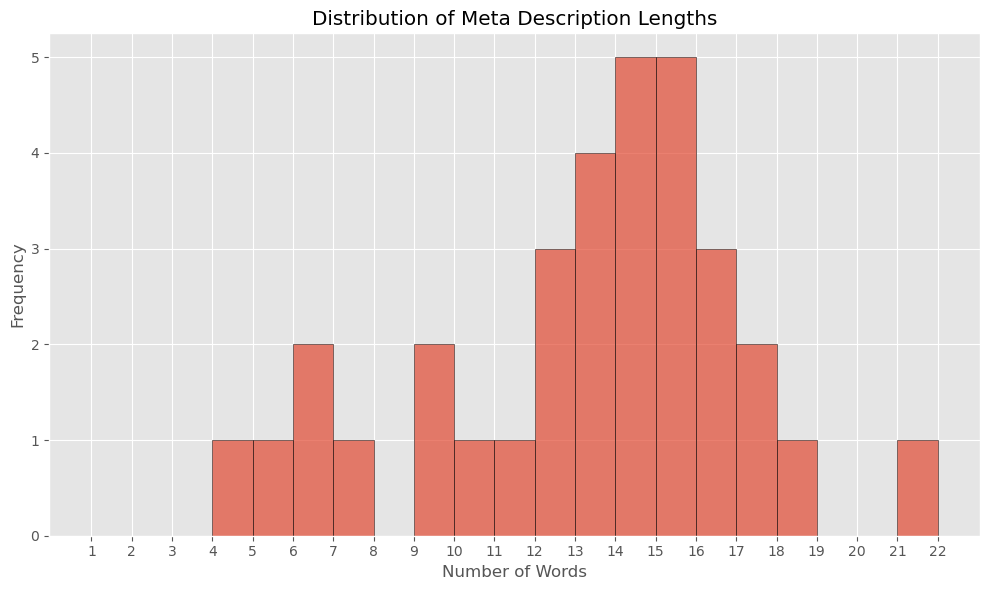

In [14]:
plot_length_distribution(preprocessed_dataframe['Meta_Description'], "Meta Description")

## Analysis of Meta Description:
The average length of a meta description is 11.69 words, around double the length of the meta title but still relatively concise. Similar to the meta title, most ngrams occur fewer than four times other than 10 unigrams. Given that only four guides are analyzed per question, these numbers are still significant.

Trigrams provided limited insight, with only two trigrams ("need manage change" and "everything need know") appearing twice, which are difficult to interpret as actionable or relevant. However, unigrams and bigrams offered more meaningful patterns. Unigrams showed frequencies of 3-6 for 23 unique words, indicating a strong emphasis on terms relevant to the guides and overlapping with Google search queries.

Bigram analysis revealed 2-3 occurrences for 12 bigrams of which 8 were relevant, which, while less frequent, still provides useful insight into key terms. Relevant words and phrases with 2-6 appearances include: save Mayrina, install mods, optimize party, change class, owlbear cub, Auntie Ethel, spells, recruit, character, multiclass, and Minthara.
These findings highlight the importance of aligning meta descriptions with Google search queries to maintain relevance and improve SEO performance. Similar to the meta title analysis, this underscores how key guide-related terms are effectively used to capture user intent and drive traffic.

## Save Fully Processed Data

In [15]:
preprocessed_dataframe.to_pickle("data/fully_processed_data.pkl")
preprocessed_dataframe.to_csv("data/fully_processed_data.csv", index=False)